In [1]:
import pandas as pd
import numpy as np
from NeuralNetwork.layers import LSTM, Dense
from NeuralNetwork.lemah import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("./Data/RNN/ETH-USD-Train.csv")
test = pd.read_csv("./Data/RNN/ETH-USD-Test.csv")

In [3]:
display(train.head())
display(test.head())

,Date,Open,High,Low,Close,Volume
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984
1,2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984
2,2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992
3,2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936
4,2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984


,Date,Open,High,Low,Close,Volume
0,2022-08-25 00:00:00+00:00,1657.336548,1718.183228,1656.856079,1696.457031,14818795695
1,2022-08-26 00:00:00+00:00,1696.324585,1698.561035,1498.771240,1507.782837,26713710143
2,2022-08-27 00:00:00+00:00,1508.156982,1517.150024,1454.282959,1491.395020,18120831899
3,2022-08-28 00:00:00+00:00,1491.206787,1505.791992,1430.547363,1430.547363,12823572918
4,2022-08-29 00:00:00+00:00,1430.439453,1556.309570,1427.728394,1553.037354,17965837488


In [4]:
train = train.drop("Date", axis=1)
train

,Open,High,Low,Close,Volume
0,308.644989,329.451996,307.056000,320.884003,893249984
1,320.670990,324.717987,294.541992,299.252991,885985984
2,298.585999,319.453003,298.191986,314.681000,842300992
3,314.690002,319.153015,298.513000,307.907990,1613479936
4,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
1745,1612.650635,1652.218750,1534.298828,1577.003784,18334580263
1746,1576.543579,1640.936523,1569.046509,1619.318970,15849221752
1747,1619.166870,1622.778809,1535.014771,1622.505859,18557078599
1748,1622.939331,1666.676514,1569.428589,1662.769897,18322041914


In [5]:
label = train.columns.values
label

array(['Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [6]:
N_PAST = 32
N_FEATURES = 5

In [7]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[0.04747676, 0.05078878, 0.04837454, 0.0500395 , 0.0032377 ],
       [0.05002152, 0.04980383, 0.04567477, 0.0454642 , 0.00315108],
       [0.04534823, 0.04870841, 0.04646222, 0.04872747, 0.00263016],
       ...,
       [0.32478943, 0.31987522, 0.31329436, 0.32535309, 0.21386946],
       [0.3255877 , 0.32900847, 0.3207188 , 0.33386958, 0.21106678],
       [0.33400029, 0.33314491, 0.32949308, 0.33266167, 0.19268987]])

In [8]:
model = Sequential([
    LSTM(32, input_shape=(N_PAST, N_FEATURES)),
    Dense(N_FEATURES, activation='relu')
])

In [9]:
model.summary()

Layer (type)    Output Shape      Param #
--------------  --------------  ---------
LSTM            (32,)                4864
Dense           (5,)                  165
Total params :  5029
Trainable params :  5029
Non-trainable params :  0


In [10]:
test_pred = []
cur_input = train[N_PAST * -1:]
for i in range(len(test)):
    pred_test = model(np.expand_dims(cur_input[N_PAST * -1:], axis=0))
    pred_test_denorm = scaler.inverse_transform(pred_test)
    test_pred.append(pred_test_denorm[0])
    cur_input = np.append(cur_input, pred_test, axis=0)

In [11]:
test_pred = np.array(test_pred)

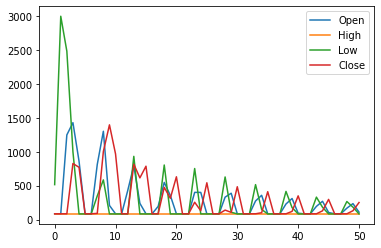

In [12]:
for i in range(N_FEATURES-1):
    plt.plot(test_pred[:, i], label=label[i])
plt.legend()

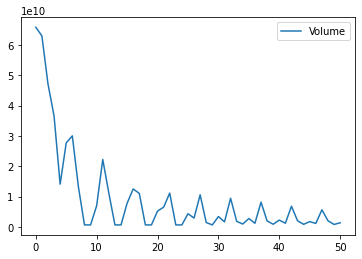

In [13]:
plt.plot(test_pred[:, 4], label=label[4])
plt.legend()